In [1]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\bough\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import re
from unidecode import unidecode

In [3]:
# Charger le CSV généré précédemment
try:
    df = pd.read_csv("casimage_nettoye.csv", encoding='utf-8', on_bad_lines='skip')
except UnicodeDecodeError:
    df = pd.read_csv("casimage_nettoye.csv", encoding='latin1', on_bad_lines='skip')

print(f" Fichier chargé - {df.shape[0]} lignes, {df.shape[1]} colonnes")

 Fichier chargé - 1691 lignes, 48 colonnes


In [52]:
df['Date'].unique()

array(['21.03.2003', '31.03.2003', '04.04.2003', '27.03.2003',
       '02.04.2003', '28.03.2003', '01.04.2003', '03.04.2003',
       '03.07.2005', '03.09.2004'], dtype=object)

In [54]:
len(df['Description'].unique())

1585

In [4]:
#Inspection initiale
print("\n--- Aperçu des données ---")
print(df.head(3))
print("\n--- Valeurs manquantes ---")
print(df.isna().sum().sort_values(ascending=False).head(10))



--- Aperçu des données ---
   ACR ANSWERA ANSWERB ANSWERC ANSWERD  Age Anatomy        Author   Birthdate  \
0  NaN   FSP-6   FSP-4   FSP-5   FSP-7   44     NaN  BERIS Photis  18.08.2003   
1  NaN     NaN     NaN     NaN     NaN    0     NaN  BERIS Photis  18.08.2003   
2  NaN     NaN     NaN     NaN     NaN    0     NaN  BERIS Photis  18.08.2003   

   CASIMAGE_CASE  ... QCM                                        QUESTION  \
0            NaN  ... NaN  Le lymphocyte stimulÃ© se trouve sur l'image :   
1            NaN  ... NaN                                             NaN   
2            NaN  ... NaN                                             NaN   

  References Reviewer Sex State                   Title  URL WEBLINK  \
0        NaN      NaN NaN   NaN  HÃ©matologie-APP-2Ã¨me  NaN     NaN   
1        NaN      NaN NaN   NaN  HÃ©matologie-APP-2Ã¨me  NaN     NaN   
2        NaN      NaN NaN   NaN  HÃ©matologie-APP-2Ã¨me  NaN     NaN   

                                              WEB

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ACR                   911 non-null    object 
 1   ANSWERA               66 non-null     object 
 2   ANSWERB               66 non-null     object 
 3   ANSWERC               67 non-null     object 
 4   ANSWERD               66 non-null     object 
 5   Age                   1691 non-null   int64  
 6   Anatomy               524 non-null    object 
 7   Author                804 non-null    object 
 8   Birthdate             1691 non-null   object 
 9   CASIMAGE_CASE         0 non-null      float64
 10  COMMENTARY            23 non-null     object 
 11  CaseID                696 non-null    float64
 12  Chapter               987 non-null    object 
 13  ClinicalPresentation  1432 non-null   object 
 14  Commentary            1469 non-null   object 
 15  Creation             

In [57]:
# Nombre de valeurs manquantes par colonne
missing = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing)


Valeurs manquantes par colonne :
ACR                      780
ANSWERA                 1625
ANSWERB                 1625
ANSWERC                 1624
ANSWERD                 1625
Age                        0
Anatomy                 1167
Author                   887
Birthdate                  0
CASIMAGE_CASE           1691
COMMENTARY              1668
CaseID                   995
Chapter                  704
ClinicalPresentation     259
Commentary               222
Creation                   0
DESCRIPTION             1689
Date                       0
DateTime                   0
Department                32
Description               27
Diagnosis                  1
Hospital                  32
ID                         0
ImageThumbnaillID          0
KeyWords                1473
LINK                    1691
Language                   1
ODislocation               0
OGraft                     0
OImplant                1690
OJoint                  1690
OLocation               1689
OOpen     

In [5]:
import pandas as pd

# Liste des colonnes à supprimer
colonnes_a_supprimer = [
    "CASIMAGE_CASE",
    "WEBLINK",
    "QCM",
    "LINK",
    "Sex",
    "OImplant",
    "OJoint",
    "URL",
    "OLocation",
    "DESCRIPTION"
]

# Supprimer les colonnes
df = df.drop(columns=colonnes_a_supprimer)

# Afficher le DataFrame pour vérifier
print(df.head())


   ACR ANSWERA ANSWERB ANSWERC ANSWERD  Age Anatomy        Author   Birthdate  \
0  NaN   FSP-6   FSP-4   FSP-5   FSP-7   44     NaN  BERIS Photis  18.08.2003   
1  NaN     NaN     NaN     NaN     NaN    0     NaN  BERIS Photis  18.08.2003   
2  NaN     NaN     NaN     NaN     NaN    0     NaN  BERIS Photis  18.08.2003   
3  NaN     NaN     NaN     NaN     NaN   77     NaN  BERIS Photis  18.08.2003   
4  NaN     NaN     NaN     NaN     NaN   40     NaN  BERIS Photis  18.08.2003   

  COMMENTARY  ...  OOperation OPathologic OPolytrauma Order  \
0        NaN  ...    00.00.00           0           0     0   
1        NaN  ...    00.00.00           0           0     0   
2        NaN  ...    00.00.00           0           0     0   
3        NaN  ...    00.00.00           0           0     0   
4        NaN  ...    00.00.00           0           0     0   

                                         QUESTION References Reviewer State  \
0  Le lymphocyte stimulÃ© se trouve sur l'image :      

In [6]:
# Suppression des colonnes trop vides
missing_ratio = df.isna().mean()
cols_to_drop = missing_ratio[missing_ratio > 0.8].index
df.drop(columns=cols_to_drop, inplace=True)
print(f"\n Colonnes supprimées (>80% NaN): {list(cols_to_drop)}")


 Colonnes supprimées (>80% NaN): ['ANSWERA', 'ANSWERB', 'ANSWERC', 'ANSWERD', 'COMMENTARY', 'KeyWords', 'QUESTION', 'State']


In [7]:
# Suppression des doublons et lignes vides
df.drop_duplicates(inplace=True)
df.dropna(how='all', inplace=True)


In [29]:
# Nettoyage des colonnes texte
def clean_text(text):
    if isinstance(text, str):
        text = text.strip()  # retire espaces
        text = unidecode(text)  # enlève les accents et caractères bizarres
        text = re.sub(r'\s+', ' ', text)  # espaces multiples → un seul
        text = re.sub(r'[^\w\s\-\.\,]', '', text)  # supprime caractères spéciaux
        return text
    return text

text_cols = df.select_dtypes(include=['object']).columns
for col in text_cols:
    df[col] = df[col].apply(clean_text)


In [8]:
# Standardiser les noms de colonnes
df.columns = (
    df.columns
    .str.strip()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('/', '_')
    .str.lower()
)

In [31]:
# Correction des dates
if 'birthdate' in df.columns:
    df['birthdate'] = pd.to_datetime(df['birthdate'], errors='coerce', dayfirst=True)

In [9]:
import pandas as pd

# Liste des colonnes à supprimer
colonnes_a_supprimer = [
    "birthdate"
    
]

# Supprimer les colonnes
df = df.drop(columns=colonnes_a_supprimer)

# Afficher le DataFrame pour vérifier
print(df.head())


   acr  age anatomy        author  caseid chapter  \
0  NaN   44     NaN  BERIS Photis     NaN     NaN   
1  NaN    0     NaN  BERIS Photis     NaN     NaN   
2  NaN    0     NaN  BERIS Photis     NaN     NaN   
3  NaN   77     NaN  BERIS Photis     NaN     NaN   
4  NaN   40     NaN  BERIS Photis     NaN     NaN   

                                clinicalpresentation commentary    creation  \
0  Il s'agit d'une donneuse de sang de 44 ans.\nS...        NaN  15.01.2003   
1  Les Ã©lÃ©ments figurÃ©s du sang (globules\nrou...        NaN  24.01.2003   
2  Cas n* 1, images RETI-1 et RETI-2. Il s'agit\n...        NaN  23.01.2003   
3  Il s'agit d'un patient en trÃ¨s bonne santÃ©.\...        NaN  20.01.2003   
4  Il s'agit d'un patient de 40 ans, chez qui un\...        NaN  22.01.2003   

         date  ... ograft oopen ooperation opathologic opolytrauma  order  \
0  21.03.2003  ...      0     0   00.00.00           0           0      0   
1  21.03.2003  ...      0     0   00.00.00          

In [12]:
import pandas as pd

# Supposons que ton DataFrame s'appelle df

# Définir un seuil : ici 5% de valeurs non-nulles
seuil = 0.05 * len(df)

# Sélectionner les colonnes à supprimer
colonnes_a_supprimer = df.columns[df.count() < seuil]

# Supprimer les colonnes
df.drop(columns=colonnes_a_supprimer, inplace=True)

# Afficher les colonnes restantes
print(df.columns)


Index(['acr', 'age', 'anatomy', 'author', 'caseid', 'chapter',
       'clinicalpresentation', 'commentary', 'creation', 'date', 'datetime',
       'department', 'description', 'diagnosis', 'hospital', 'id',
       'imagethumbnaillid', 'language', 'odislocation', 'ograft', 'oopen',
       'ooperation', 'opathologic', 'opolytrauma', 'order', 'references',
       'reviewer', 'title', 'weburl'],
      dtype='object')


In [13]:
#  Vérification finale
print("\n Nettoyage terminé")
print(f"  Nouvelles dimensions : {df.shape}")
print(f"  Valeurs manquantes totales : {df.isna().sum().sum()}")



 Nettoyage terminé
  Nouvelles dimensions : (1691, 29)
  Valeurs manquantes totales : 7495


In [14]:
# Sauvegarde propre
df.to_csv("data_nettoyee_pro.csv", index=False, encoding='utf-8')

In [15]:
def data_quality_report(df):
    report = pd.DataFrame({
        'Type': df.dtypes,
        'Nb_Valeurs_Uniques': df.nunique(),
        'Nb_NaN': df.isna().sum(),
        '%_NaN': round(df.isna().mean() * 100, 2)
    })
    return report.sort_values('%_NaN', ascending=False)

rapport = data_quality_report(df)
print("\n--- Rapport de qualité des données ---")
print(rapport.head(15))



--- Rapport de qualité des données ---
                         Type  Nb_Valeurs_Uniques  Nb_NaN  %_NaN
references             object                 260    1349  79.78
anatomy                object                 124    1167  69.01
reviewer               object                  22    1039  61.44
caseid                float64                 660     995  58.84
author                 object                  64     887  52.45
acr                    object                 640     780  46.13
chapter                object                 190     704  41.63
clinicalpresentation   object                1343     259  15.32
commentary             object                1346     222  13.13
department             object                   4      32   1.89
hospital               object                   1      32   1.89
description            object                1584      27   1.60
diagnosis              object                1447       1   0.06
language               object                   1 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Option pour de jolis graphiques
sns.set(style="whitegrid")


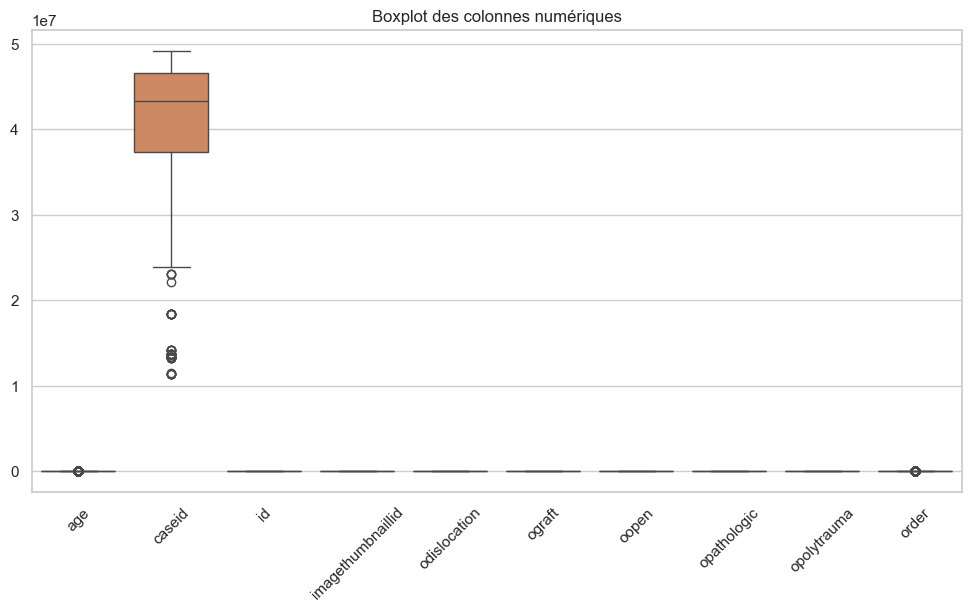

In [17]:
# Sélectionner les colonnes numériques
num_cols = df.select_dtypes(include=['int64','float64']).columns

# Boxplot pour toutes les colonnes numériques
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot des colonnes numériques")
plt.xticks(rotation=45)
plt.show()


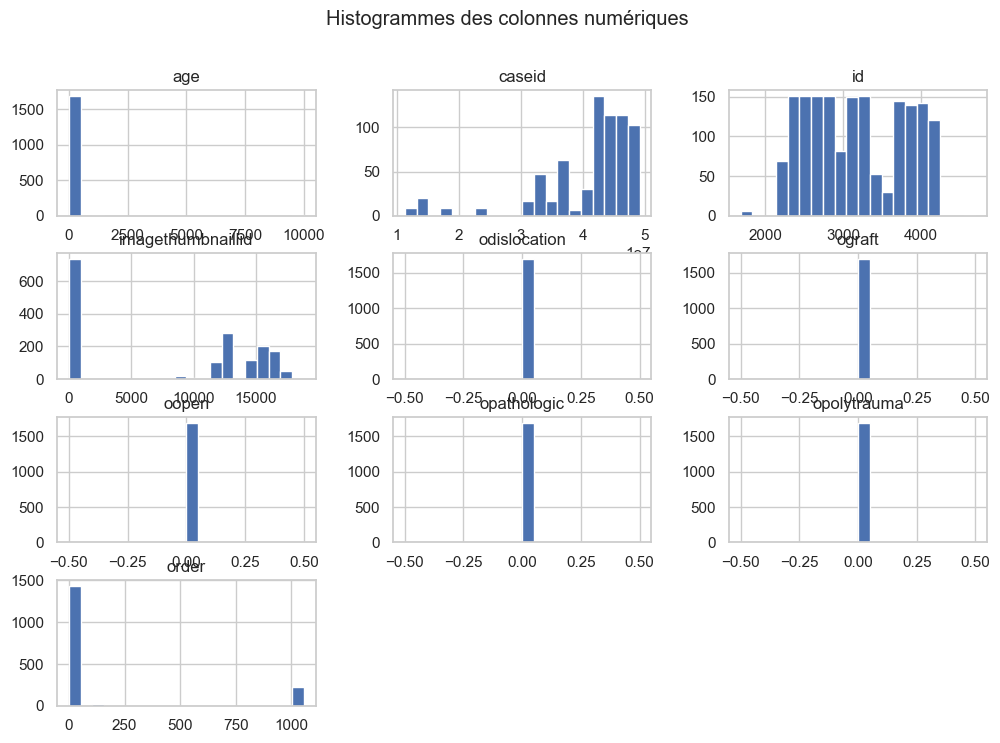

In [18]:
df[num_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Histogrammes des colonnes numériques")
plt.show()


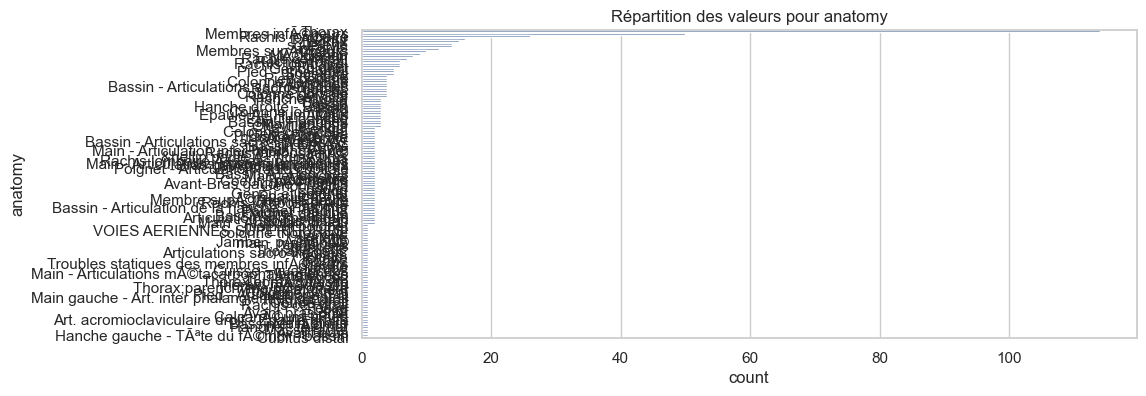

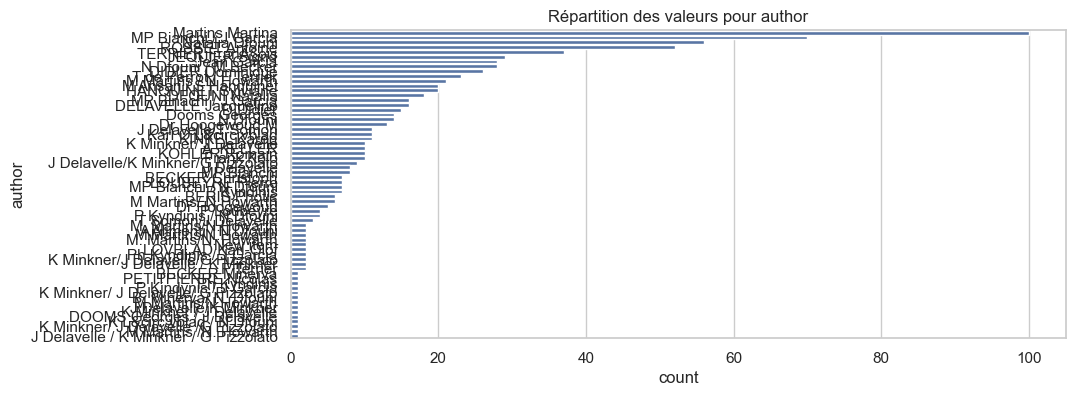

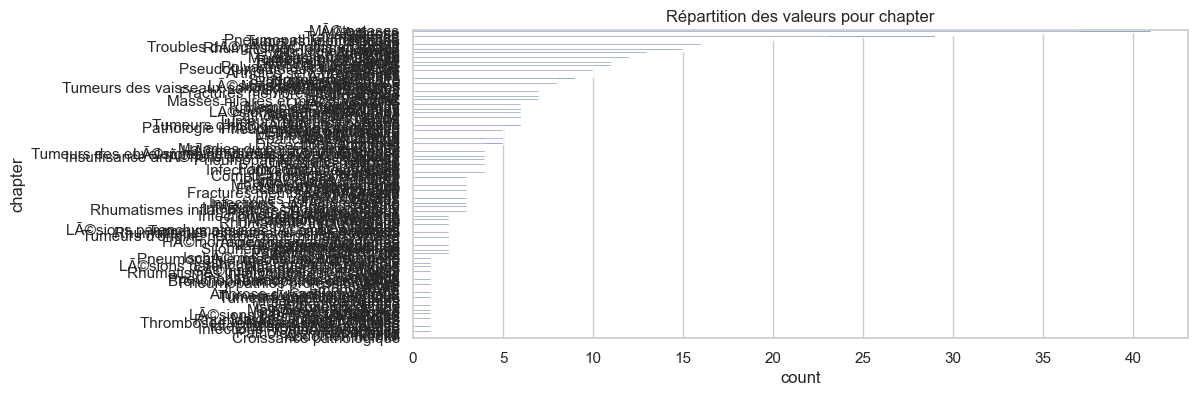

C:\Users\bough\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 142 (\x8e) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bough\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bough\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 134 (\x86) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


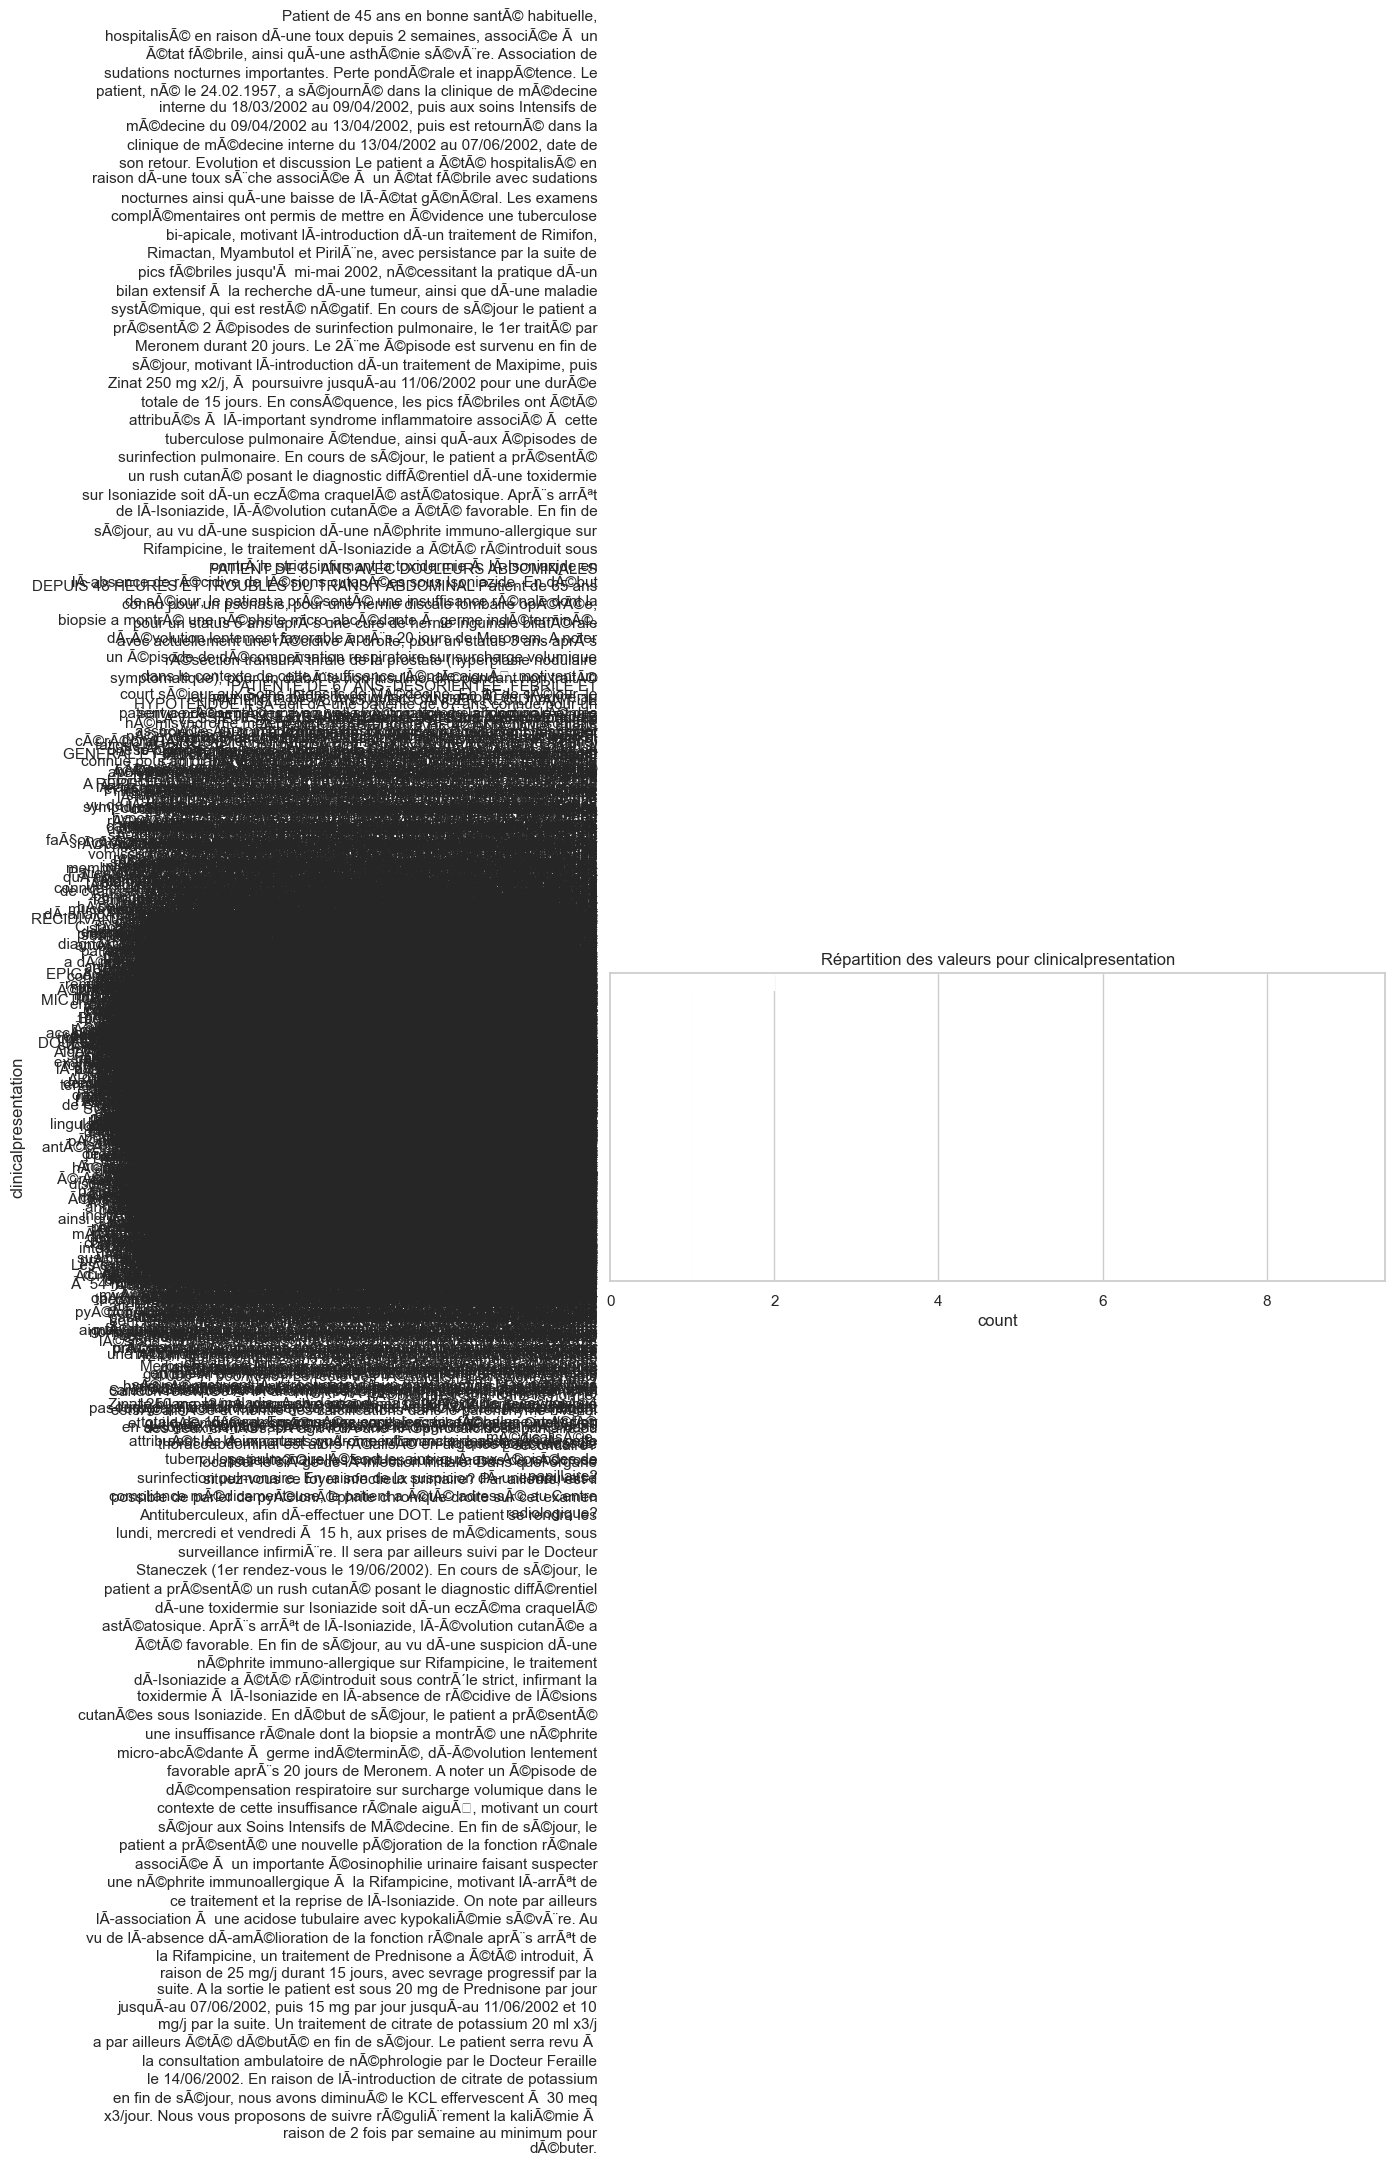

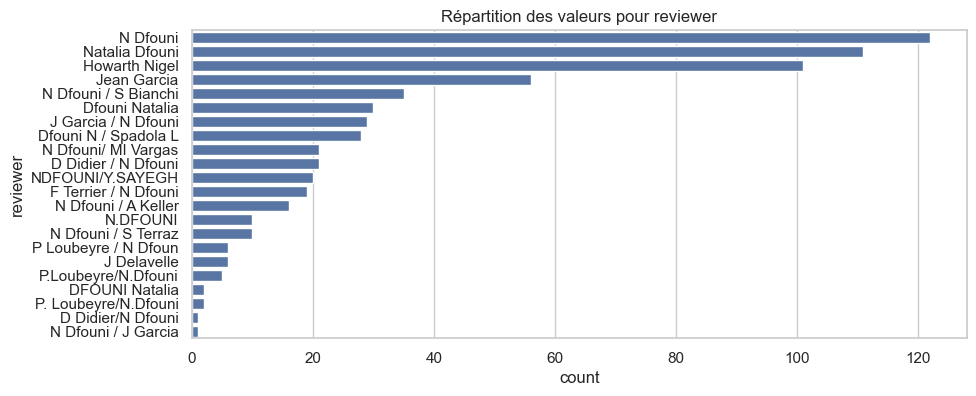

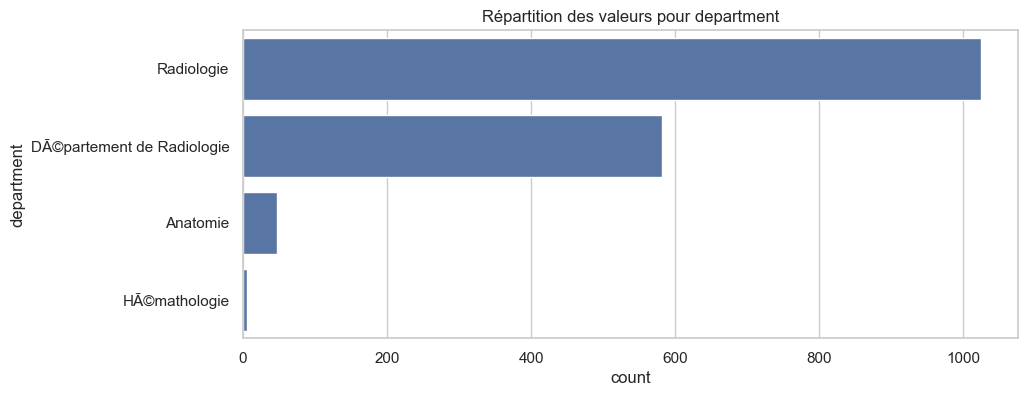

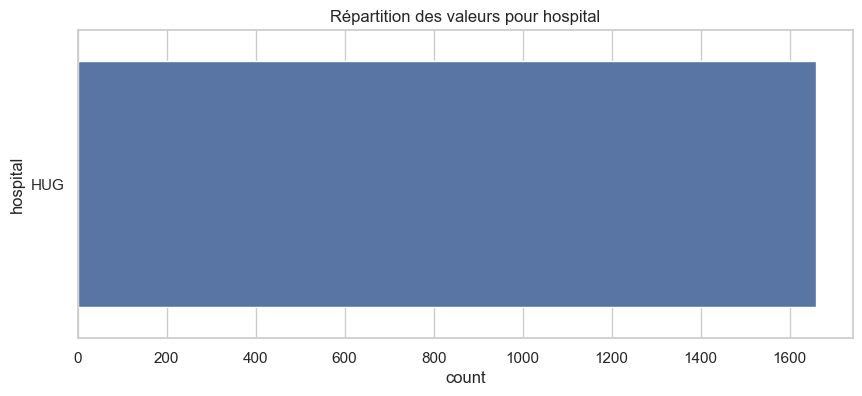

In [22]:
# Colonnes catégoriques importantes (avec les bons noms en minuscules)
cat_cols = ['anatomy','author','chapter','clinicalpresentation','reviewer','department','hospital']

for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Répartition des valeurs pour {col}")
    plt.show()


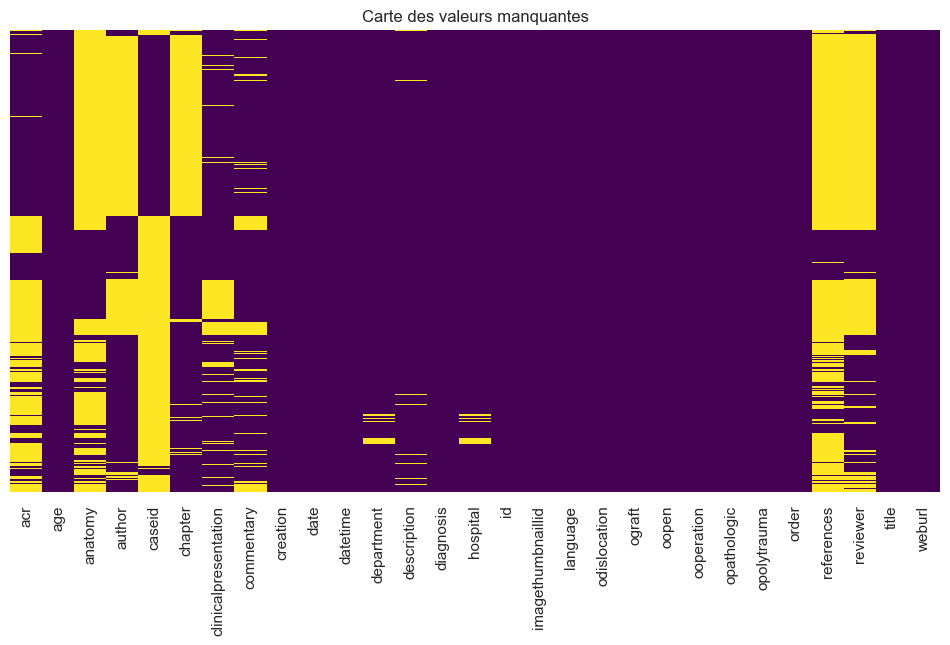

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Carte des valeurs manquantes")
plt.show()


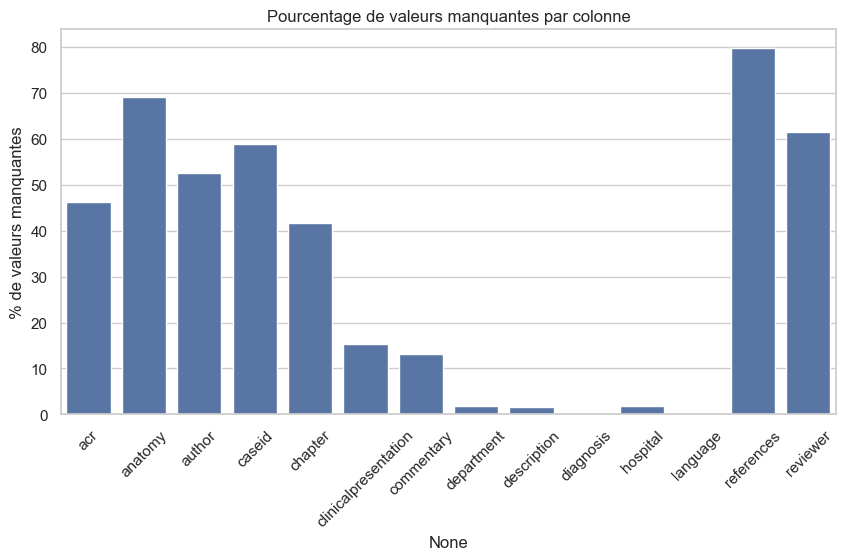

In [21]:
missing_percent = df.isna().mean() * 100
missing_percent = missing_percent[missing_percent > 0]

plt.figure(figsize=(10,5))
sns.barplot(x=missing_percent.index, y=missing_percent.values)
plt.xticks(rotation=45)
plt.ylabel("% de valeurs manquantes")
plt.title("Pourcentage de valeurs manquantes par colonne")
plt.show()


In [23]:
import pandas as pd

# Colonnes de dates dans ton dataset
date_cols = ['date', 'datetime', 'creation']  

for col in date_cols:
    if col in df.columns:  # vérifier que la colonne existe
        df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)
        print(f"{col} convertie avec succès !")


date convertie avec succès !
datetime convertie avec succès !
creation convertie avec succès !


C:\Users\bough\AppData\Local\Temp\ipykernel_29384\1367783022.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)


In [24]:
# Vérifier le type
print(df.dtypes)
# Afficher les premières lignes
print(df.head())


acr                             object
age                              int64
anatomy                         object
author                          object
caseid                         float64
chapter                         object
clinicalpresentation            object
commentary                      object
creation                datetime64[ns]
date                    datetime64[ns]
datetime                datetime64[ns]
department                      object
description                     object
diagnosis                       object
hospital                        object
id                               int64
imagethumbnaillid                int64
language                        object
odislocation                     int64
ograft                           int64
oopen                            int64
ooperation                      object
opathologic                      int64
opolytrauma                      int64
order                            int64
references               

In [25]:
# Sauvegarde propre
df.to_csv("data_nettoyee_pro.csv", index=False, encoding='utf-8')